In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv(r"cleaned_cars.csv")
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,price_per_km
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502.365184
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,8926.553672
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,9782.608696
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,8074.534161


In [2]:
df.selling_price.mean()

501378.18114682887

In [3]:
value_counts = df["fuel"].value_counts()
print(value_counts)

fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64


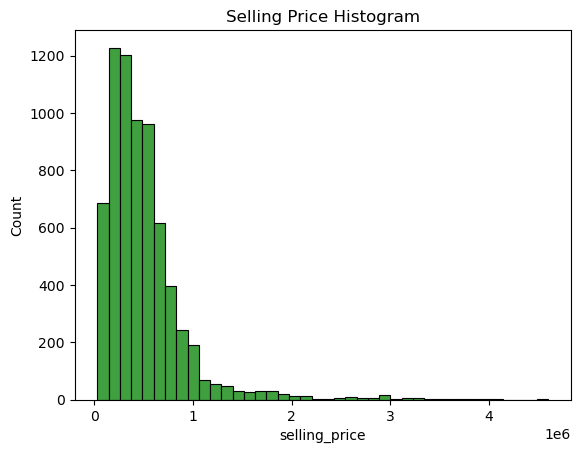

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="selling_price",bins=40,color="Green")
plt.title("Selling Price Histogram")
plt.xlabel("selling_price")
plt.show()

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='selling_price', alpha=0.7, palette='viridis', size='selling_price', sizes=(20, 200))

plt.title('Car Age vs. Selling Price', fontsize=14)
plt.xlabel('Car Age (years)', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='selling_price', alpha=0.7, hue='age', palette='viridis', size='selling_price', sizes=(20, 200))

plt.title('Car Age vs. Selling Price', fontsize=14)
plt.xlabel('Car Age (years)', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
df.groupby('fuel')['selling_price'].mean()

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64

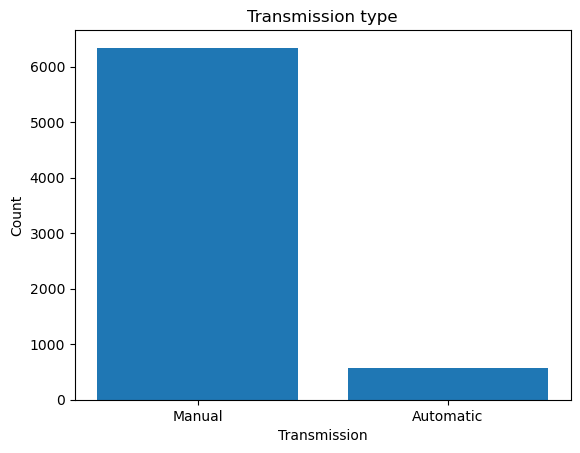

In [ ]:
Transmission = ['Manual', 'Automatic']
Count = [6342,564]

plt.bar(Transmission, Count)
plt.title('Transmission type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

In [ ]:
#car with the highest mileage
df['mileage(km/ltr/kg)'].idxmax(axis = 0)

35

In [ ]:
highest_mileage = df.loc[df.index[35], 'mileage(km/ltr/kg)'] 
print(highest_mileage)

33.44


In [ ]:
#correlation between mileage and selling price
correlation = df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: -0.12069849273188767


<Axes: >

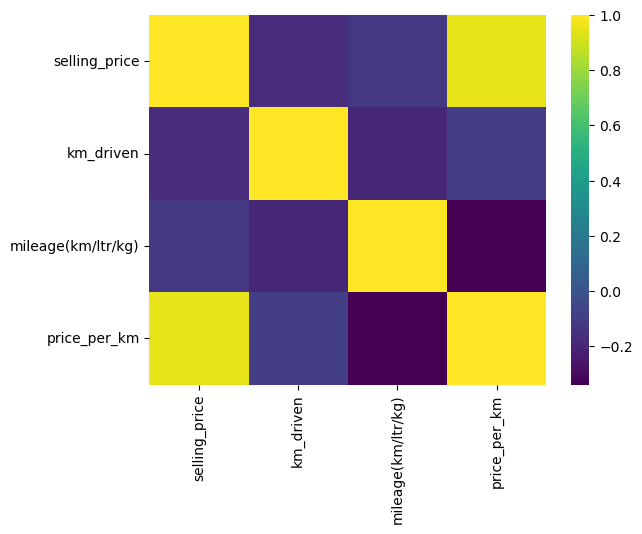

In [ ]:
#plot a heat map shwoing the correlations btwn all numeric columns
numerical_columns=df[["selling_price","km_driven","mileage(km/ltr/kg)","price_per_km"]]
sns.heatmap(numerical_columns.corr(),annot=False,cmap="viridis")

In [ ]:
#check whether manual are generally cheaper than automatic
df.groupby('transmission')['selling_price'].mean()

transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64

In [ ]:
#average selling price for each year of manufacture
df.groupby('year')['selling_price'].mean()

year
5     786548.338710
6     795583.291667
7     825749.553897
8     708006.173913
9     653180.339105
10    589177.625551
11    511858.798623
12    451501.724199
13    351387.379139
14    318335.696751
15    273897.334211
16    227691.620833
17    208397.639024
18    174894.505682
19    164383.308943
20    137994.494505
21    109364.250000
22     97034.021277
23     99153.807692
24     47220.333333
25     90047.850000
26     71470.588235
27     73100.000000
28     90181.727273
29     81666.666667
30    107500.000000
31     88000.000000
34     55000.000000
42    300000.000000
Name: selling_price, dtype: float64

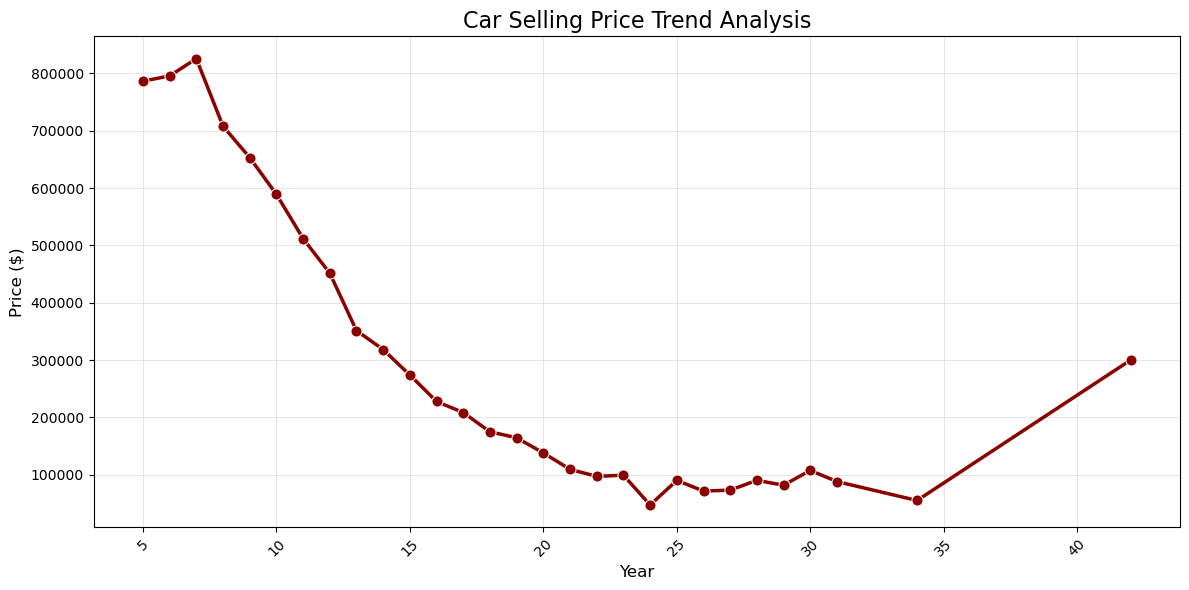

In [ ]:
#plot a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, 
             x=df['year'], 
             y='selling_price',
             estimator='mean',
             errorbar=None,
             color='darkred',
             linewidth=2.5,
             marker='o',
             markersize=8)

plt.title('Car Selling Price Trend Analysis', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#find the most expensive car each fuel type
most_expensive = df.loc[df.groupby('fuel')['selling_price'].idxmax()]

print(most_expensive[['fuel', 'name', 'selling_price']])

        fuel                                      name  selling_price
4961     CNG     Maruti Ertiga VXI CNG Limited Edition         545000
283   Diesel  Mercedes-Benz GL-Class 220d 4MATIC Sport        4600000
2783     LPG               Hyundai i10 Sportz 1.1L LPG         375000
133   Petrol           Jeep Wrangler 2016-2019 3.6 4X4        4100000


In [ ]:
#brand that appears most frequently
df.groupby('name')['name'].count().nlargest(1)

name
Maruti Swift Dzire VDI    118
Name: name, dtype: int64

In [ ]:
#the 5 molst common combinations of fuel type and transimision
top5_combinations = df[['fuel', 'transmission']].value_counts().head(5)

print(top5_combinations)

fuel    transmission
Diesel  Manual          3457
Petrol  Manual          2791
Diesel  Automatic        284
Petrol  Automatic        280
CNG     Manual            56
Name: count, dtype: int64


In [ ]:
combination=df.groupby(["fuel","transmission"]).size().reset_index(name="count")

In [ ]:
top_combination=combination.sort_values(by="count", ascending=False).head(5)
print(top_combination)

     fuel transmission  count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    284
4  Petrol    Automatic    280
0     CNG       Manual     56


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df.keys()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'price_per_km'],
      dtype='object')

In [6]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,price_per_km
count,6906.000000,6.906000e+03,6.906000e+03,6906.000000,6698.000000,6698.000000,6.906000e+03
mean,11.594411,5.013782e+05,7.414806e+04,19.469842,1428.192744,5.436399,inf
std,4.074771,4.247149e+05,5.836971e+04,3.978736,490.988361,0.984531,NaN
min,5.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000,1.544896e+03
25%,8.000000,2.500000e+05,4.000000e+04,16.950000,1197.000000,5.000000,1.214575e+04
50%,11.000000,4.000000e+05,7.000000e+04,19.418783,1248.000000,5.000000,2.043216e+04
75%,14.000000,6.300000e+05,1.000000e+05,22.320000,1498.000000,5.000000,3.198946e+04
max,42.000000,4.600000e+06,2.360457e+06,33.440000,3604.000000,14.000000,inf


In [11]:
import numpy as np

# Replace infinity values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Drop rows that have NaN values
df = df.dropna()

# Reset index after dropping rows (optional)
df = df.reset_index(drop=True)

print(df.shape)  # new shape of your cleaned dataset
df.describe()


(6683, 13)


,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats,price_per_km
count,6683.000000,6.683000e+03,6.683000e+03,6683.000000,6683.000000,6683.000000,6683.000000
mean,11.402813,5.095596e+05,7.358689e+04,19.515131,1427.907377,5.438276,28145.535458
std,3.897052,4.248437e+05,5.875120e+04,3.937710,490.524870,0.983650,29418.235726
min,5.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,4.000000,1730.769231
25%,8.000000,2.500000e+05,3.821300e+04,16.800000,1197.000000,5.000000,12526.096033
50%,11.000000,4.150000e+05,6.900000e+04,19.500000,1248.000000,5.000000,20858.164482
75%,14.000000,6.450000e+05,1.000000e+05,22.540000,1498.000000,5.000000,32325.778709
max,31.000000,4.600000e+06,2.360457e+06,33.440000,3604.000000,14.000000,431578.947368


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#defining our y and x - the dependent and the independent variables
y=df[['selling_price']]
x=df[['year','km_driven','mileage(km/ltr/kg)','engine','seats','price_per_km']]

In [14]:
print(x)

      year  km_driven  mileage(km/ltr/kg)  engine  seats  price_per_km
0       11     145500               23.40  1248.0    5.0  19230.769231
1       11     120000               21.14  1498.0    5.0  17502.365184
2       19     140000               17.70  1497.0    5.0   8926.553672
3       15     127000               23.00  1396.0    5.0   9782.608696
4       18     120000               16.10  1298.0    5.0   8074.534161
...    ...        ...                 ...     ...    ...           ...
6678    12      50000               18.90   998.0    5.0  13756.613757
6679    11      80000               22.54  1396.0    5.0  21073.646850
6680    12     110000               18.50  1197.0    5.0  17297.297297
6681    18     119000               16.80  1493.0    5.0   8035.714286
6682    16     120000               19.30  1248.0    5.0  19792.746114

[6683 rows x 6 columns]


In [15]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=11)
print(f" Shape of x_train: {x_train.shape}")
print("*" * 70)
print(f" Shape of x_test: {x_test.shape}")
print("*" * 70)

 Shape of x_train: (5346, 6)
**********************************************************************
 Shape of x_test: (1337, 6)
**********************************************************************


In [ ]:
#initializing the x and y
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
#testing the model
pred= model.predict(x)
print(pred)

[[459791.35538102]
 [402139.30708339]
 [138034.81766672]
 ...
 [322742.20418412]
 [117569.59597675]
 [340087.89189837]]


In [19]:
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: [-189654.48491881]
Slope: [-8.84628087e+03 -9.99450113e-02  2.09357534e+04  4.46106791e+01
 -1.03467833e+04  1.39079246e+01]


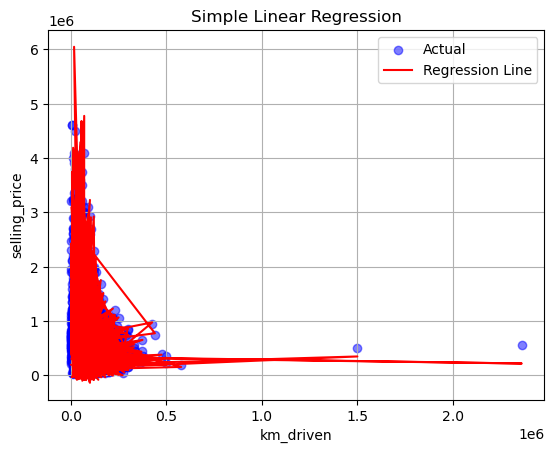

In [23]:
df['Predicted'] =model.predict(x)

plt.scatter(df["km_driven"], df["selling_price"], label="Actual", color="blue", alpha=0.5)
plt.plot(df["km_driven"], df["Predicted"], label="Regression Line", color="red")
plt.title("Simple Linear Regression")
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.legend()
plt.grid()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 52717.81211174892
MSE: 9129979539.94076
RMSE: 95550.92642115387
R-squared: 0.9467127533177617
